<a href="https://www.kaggle.com/code/piyushjain572/complete-case-analysis?scriptVersionId=199555326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/data-science-jobs/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.shape

(19158, 13)

In [3]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [7]:
print('%age of data missing in each col.')
df.isnull().sum()/df.shape[0]*100

%age of data missing in each col.


enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
cols = [var for var in df if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
new_df = df[cols]
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

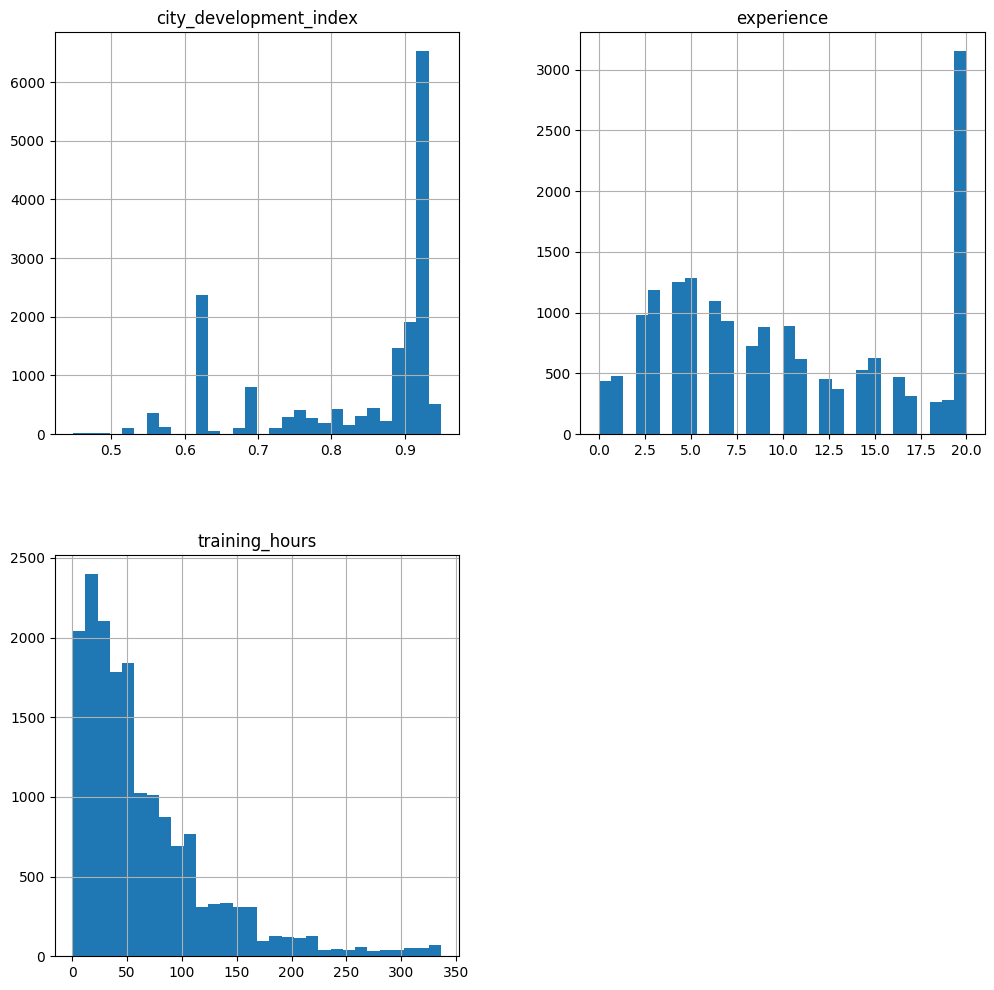

In [16]:
new_df.hist(bins=30,figsize=(12,12))

In [17]:
# Together if we remove all the na rows of these cols, lets see how much data loss is there.
len(df[cols].dropna())/len(df)

0.8968577095730244

In [14]:
# Only 10% data i dropped that is great, lets go ahead with dropping it. \
new_df = df[cols].dropna()
new_df.shape, df.shape

((17182, 5), (19158, 13))

### Now check for the distribution of each col where you dropped na rows. The distribution before and after applying CCA should be almost same.

<Axes: ylabel='Density'>

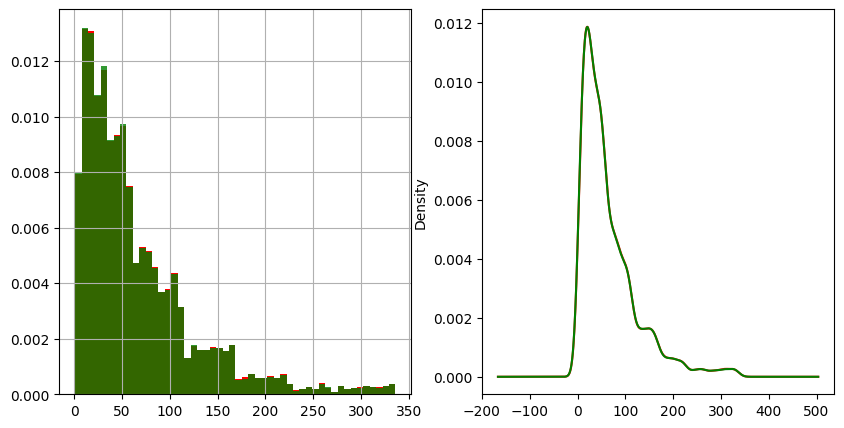

In [31]:
fig = plt.figure(figsize=(10,5))
ax1,ax2 = fig.subplots(nrows=1,ncols=2)

# original data
df['training_hours'].hist(bins=50, ax=ax1, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax1, color='green', density=True, alpha=0.8)

df['training_hours'].plot(kind='kde',ax=ax2,color='red')
new_df['training_hours'].plot(kind='kde',ax=ax2,color='green')

<Axes: ylabel='Density'>

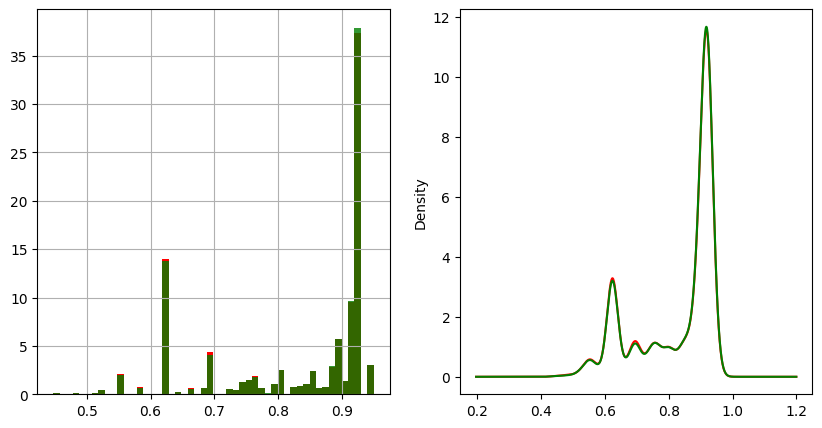

In [32]:
fig = plt.figure(figsize=(10,5))
ax1,ax2 = fig.subplots(nrows=1,ncols=2)

df['city_development_index'].hist(bins=50,density=True,ax=ax1,color='red')
new_df['city_development_index'].hist(bins=50,density=True,ax=ax1,alpha=0.8,color='green')

df['city_development_index'].plot(kind='kde',ax=ax2,color='red')
new_df['city_development_index'].plot(kind='kde',ax=ax2,color='green')

<Axes: ylabel='Density'>

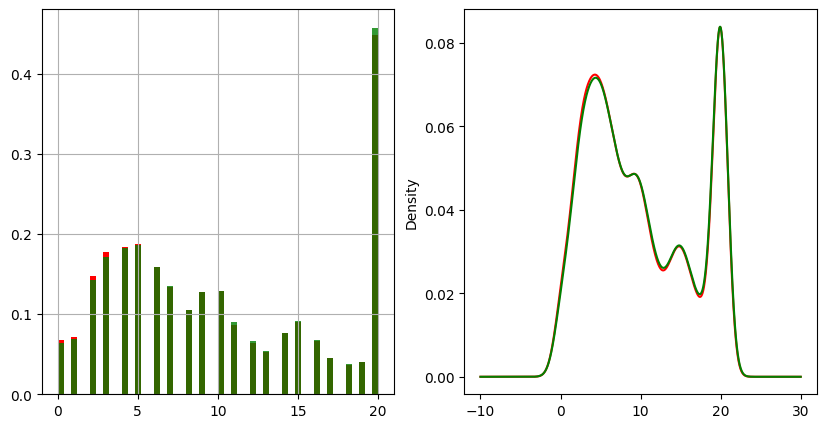

In [34]:
fig = plt.figure(figsize=(10,5))
ax1,ax2 = fig.subplots(nrows=1,ncols=2)

df['experience'].hist(bins=50,color='red',ax=ax1,density=True)
new_df['experience'].hist(bins=50,color='green',ax=ax1,density=True,alpha=0.8)

df['experience'].plot(kind='kde',ax=ax2,color='red')
new_df['experience'].plot(kind='kde',ax=ax2,color='green')

### Three numerical cols are looking great, lets go to remaning 2 categorical cols.

In [39]:
temp = pd.concat([
    df['enrolled_university'].value_counts() / len(df),
    new_df['enrolled_university'].value_counts() / len(new_df)
],axis=1,)

temp.columns = ['Orginal','CCA']
temp

,Orginal,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [41]:
temp = pd.concat([
    df['education_level'].value_counts() / len(df),
    new_df['education_level'].value_counts() / len(new_df)
],axis=1,)

temp.columns = ['Orginal','CCA']
temp

,Orginal,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


### CCA is correctly implemented.